In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Utils
# import lux
# import itertools

# DataViz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Notebook setup
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Schedule

### Exploratory Data Analysis
- Feature Engineering: discretizing and combining some variables.
- Univariate analysis
- Bivariate analysis

Let's keep an easy access to the data dictonary:

<img src="../images/data_dict.jpg" width="600" height="300">

In [41]:
ccustomers = pd.read_csv('../data/customers_cleaned.csv') # ccustomers: cleaned customers 
ccustomers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2232,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2233,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2234,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [14]:
# Checking variables with a single unique value
ccustomers.nunique()[ccustomers.nunique() == 1]

Z_CostContact    1
Z_Revenue        1
dtype: int64

As we can see, both `Z_CostContact` and `Z_Revenue` variables have only one unique value (`3` and `11`, respectively). Thus, they do not apport value for future predictions. 

It is important to notice as well, that despite their semi-explicative names, _cost_ and _revenue_, we do not have these variables listed in our Data Dictionary. They may be important for a future revenue analysis, but right now, we cannot be assertive about their meanings.

Let's drop these variables, then:

In [15]:
ccustomers.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)

In [17]:
ccustomers.shape

(2236, 27)

In [34]:
to_count = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for var in to_count:
    print(ccustomers[var].value_counts(), '\n================================ \n')

0    2092
1     144
Name: AcceptedCmp1, dtype: int64 

0    2206
1      30
Name: AcceptedCmp2, dtype: int64 

0    2073
1     163
Name: AcceptedCmp3, dtype: int64 

0    2069
1     167
Name: AcceptedCmp4, dtype: int64 

0    2074
1     162
Name: AcceptedCmp5, dtype: int64 



In [57]:
purchase_flow = ccustomers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
purchase_flow['total'] = np.sum(ccustomers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']], axis = 1)
# np.sum(np.array(ccustomers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]), axis = 1)
ccustomers[purchase_flow['total'] == 5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
250,10089,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1
427,3725,1961,PhD,Single,84865.0,0,0,2013-05-09,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,0,3,11,1
556,3174,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1
821,5536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1
987,8545,1954,Graduation,Divorced,85683.0,0,0,2014-03-21,6,1296,17,311,45,69,51,1,2,4,10,1,0,1,1,1,1,0,3,11,1
1084,1509,1958,PhD,Together,84460.0,0,0,2013-01-04,80,152,27,103,106,54,81,0,9,9,4,5,0,1,1,1,1,0,3,11,1
1305,5758,1982,Graduation,Married,65169.0,0,0,2014-01-14,23,1074,0,69,0,0,46,1,10,4,13,6,1,0,1,1,1,0,3,11,1
1707,477,1986,Graduation,Married,83512.0,0,0,2014-06-17,31,1060,61,835,80,20,101,1,4,7,10,1,1,0,1,1,1,0,3,11,1
1919,3138,1956,Graduation,Single,91249.0,0,0,2012-10-20,84,1324,27,119,71,108,27,0,7,9,6,4,0,1,1,1,1,0,3,11,1
2164,3520,1990,Master,Single,91172.0,0,0,2013-03-27,94,162,28,818,0,28,56,0,4,3,7,3,1,0,1,1,1,0,3,11,1


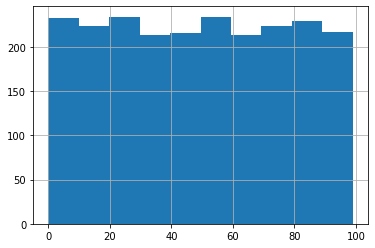

In [5]:
ccustomers['Recency'].hist();

In [8]:
ccustomers['Response'].value_counts()

0    1902
1     334
Name: Response, dtype: int64

<AxesSubplot:>

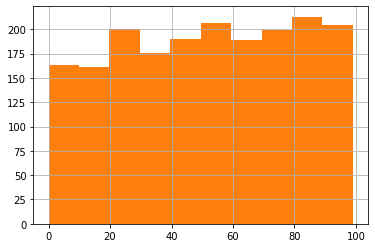

In [12]:
ccustomers[ccustomers['Response'] == 1]['Recency'].hist()
ccustomers[ccustomers['Response'] == 0]['Recency'].hist()